# Project: Wrangle and Analyze Data 

In this project, I will perform data wrangling on real-world data from the WeRateDogs Twitter account. This will be followed by analyses and visualizations.  

The following steps will be followed: 
* Gather data from three different sources: WeRateDogs tweet archives, image predictions via Udacity's neural network for classifying dog breeds, and the Twitter API. 
* Assess quality (content) and tidiness (structure) issues in the datasets. 
* Clean the data according to issues addressed. 
* Perform data analysis and create visualizations. 

## Table of Contents
<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analyze">Analyze</a></li>
</ul>

<a id='gather'></a>
## Gather

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

### 1.) WeRateDogs Archive

In [2]:
#WeRateDogs archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.) Tweet Image Predictions

In [5]:
#Tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file: 
    file.write(r.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.) Retweet/Favorite Count

In [4]:
# @hidden_cell
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [ ]:
#list of Tweet IDs to iterate through 
tweet_ids = twitter_archive.tweet_id.values

#API call; write json to a .txt file 
with open("tweet_json.txt", 'w') as output: 
    for tweet_id in tweet_ids: 
        try: 
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet not found')

print("DONE")

In [6]:
#Create a list of dicts containing information for each tweet 
tweet_list = []

with open('tweet_json.txt') as file: 
    for line in file: 
        tweet_dict = {} #dict will contain: tweetID, number of retweets, and number of favorites
        tweet_json = json.loads(line)
        
        tweet_dict['tweet'] = tweet_json['id']
        tweet_dict['retweet_count'] = tweet_json['retweet_count']
        tweet_dict['favorite_count'] = tweet_json['favorite_count']
        
        tweet_list.append(tweet_dict)

In [7]:
tweets_df = pd.DataFrame(tweet_list)
tweets_df.head()

,favorite_count,retweet_count,tweet
0,36155,7698,892420643555336193
1,31184,5694,892177421306343426
2,23488,3776,891815181378084864
3,39436,7864,891689557279858688
4,37652,8472,891327558926688256


<a id='assess'></a>
## Assess

### 1.) WeRateDogs Archive

In [8]:
#View first 10 rows of the data 
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Get info about each column in the DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#Statistics for columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#Check for decimal values that were misread in rating_numerator 
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [13]:
#Count null values 
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
#Examine list of dog names
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [15]:
#Check for duplicates by tweet_id
twitter_archive[twitter_archive.duplicated(subset = 'tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
#List of unqiue sources in dataset
sources = list(twitter_archive.source.unique())
for source in sources: 
    print(source)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>


#### Quality
1. Incorrect dog names. 
2. Dataset includes retweets and replies.  
3. Some denominators not equal to 10. While some of these are intentional, others are due to mistakenly taking the date (or another value) in the text as the rating. 
4. Some numerators 
5. `source` column difficult to read: can remove HTML tag 
7. Incorrect datatypes (`timestamp`, `retweeted_status_timestamp` should be datetime objects)


#### Tidiness
1. Dog stages (`doggo`, `floofer`, `pupper`, `puppo`) can be combined into a single column. 


### 2.) Tweet Image Predictions

In [17]:
#Examine first 5 rows 
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
#Get info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Check for null values 
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
image_predictions[~image_predictions['p1_dog'] | ~image_predictions['p2_dog'] | ~image_predictions['p3_dog']].head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False


#### Quality 
1. Some tweets contain no images (i.e., **image_predictions** dataframe has fewer rows than **twitter_archive**). 
2. Dog names in `p1`, `p2`, and `p3` columns have inconsistent formatting (capitalization and spacing). 
3. Unnecessary columns: can create a single dog_breed column based on best dog prediction. 

#### Tidiness
1. Some predictions are not dogs. 
2. Join with **twitter_archive** dataframe

### 3.) Retweet/Favorite Count

In [21]:
#Examine first 5 rows
tweets_df.head()

,favorite_count,retweet_count,tweet
0,36155,7698,892420643555336193
1,31184,5694,892177421306343426
2,23488,3776,891815181378084864
3,39436,7864,891689557279858688
4,37652,8472,891327558926688256


In [22]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet             2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
tweets_df.describe()[['favorite_count', 'retweet_count']]

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7548.338481,2701.489060
std,11717.467487,4567.655079
min,0.000000,1.000000
25%,1317.500000,547.000000
50%,3281.000000,1266.000000
75%,9244.000000,3141.500000
max,155966.000000,77714.000000


#### Quality 
None to report. 

#### Tidiness
1. Join with `twitter_archive` dataframe

### Assessing Data: Conclusions

#### Quality Issues
1. Dataset contains retweets and replies: values for the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, or `retweeted_status_user_id` indicate a retweet or reply (i.e., not the original rating). According to the Project Details, these will not be used in the analysis and therefore, these rows should be dropped.  
2. Some denominators not equal to 10: while some of these are intentional, others are due to mistakenly taking the date (or another value) in the text as the rating. Since there are only a few cases, these can be remedied on an individual basis. 
3. Incorrect `rating_numerator`: some decimal ratings were extracted as integers
3. Incorrect dog names: replace names in `name` that begin with a lowercase letter with null/NaN. 
4. `source` column difficult to read: can remove HTML tag.
5. Incorrect datatypes: convert `timestamp`to datetime from object (string). 
6. Extraneous information in **image_predictions**; can create single `dog_breed` column. 
7. Inconsistent capitalization/formatting for dog names in **image_predictions** 
8. Drop unnecessary columns in **image_predictions** 

#### Tidiness Issues
1. The columns `doggo`, `floofer`, `pupper`, and `puppo` in **twitter_archive** can be combined from 4 separate columns into 1 `dog_stage` column.
2. **image_predictions** and **tweets_df** can be joined with **twitter_archive** dataframe on the `tweet_id` column.

<a id='clean'></a>
## Clean

In [11]:
#Create copies of tables
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_df_clean = tweets_df.copy()

#Save as csv as checkpoint 
twitter_archive_clean.to_csv('twitter_archive_clean.csv',encoding='utf-8',index=False)
image_predictions_clean.to_csv('image_predictions_clean.csv',encoding='utf-8',index=False)
tweets_df_clean.to_csv('tweets_df_clean.csv',encoding='utf-8',index=False)

In [46]:
#Load clean files
twitter_archive_clean = pd.read_csv('twitter_archive_clean.csv')
image_predictions_clean = pd.read_csv('image_predictions_clean.csv')
tweets_df_clean = pd.read_csv('tweets_df_clean.csv')

**Quality Issue 1: Drop records that are not original tweets**
These are the records that have values for `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, or `retweeted_status_user_id`. 


In [47]:
#Check if we can just use status_id for replies and retweets; should print 0 0 
print(twitter_archive_clean.in_reply_to_status_id.count() == twitter_archive_clean.in_reply_to_user_id.count())
print(twitter_archive_clean.retweeted_status_id.count() == twitter_archive_clean.retweeted_status_user_id.count())

True
True


In [48]:
#Count number of retweets 
print("There are {} replies and {} retweets".format(twitter_archive_clean.in_reply_to_status_id.count(), twitter_archive_clean.retweeted_status_id.count()))

There are 78 replies and 181 retweets


In [49]:
#Filter out replies and retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [50]:
#Check to make sure it worked 
print("There are {} replies and {} retweets".format(twitter_archive_clean.in_reply_to_status_id.count(), twitter_archive_clean.retweeted_status_id.count()))

There are 0 replies and 0 retweets


In [51]:
#Drop the now-unncessary columns 
twitter_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Quality Issue 2: Denominators not equal to 10.**

There are a few denominators are not equal to 10. I will examine the text of these individually to see if there are any problems I can address as a group.

In [52]:
#Check for denominators that are not 10 
wrong_denom = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
denom_ids = list(wrong_denom.tweet_id)
print("There are {} ratings with a denominator not equal to 10".format(wrong_denom.shape[0]))

There are 17 ratings with a denominator not equal to 10


In [53]:
#Examine texts of ratings with denominator != 10 
for counter, text in enumerate(list(wrong_denom['text'])): 
    print("Tweet_ID: ", list(wrong_denom.tweet_id)[counter])
    print("Denominator: ", list(wrong_denom.rating_denominator)[counter])
    print(text + '\n')

Tweet_ID:  820690176645140481
Denominator:  70
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Tweet_ID:  810984652412424192
Denominator:  7
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

Tweet_ID:  758467244762497024
Denominator:  150
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

Tweet_ID:  740373189193256964
Denominator:  11
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Tweet_ID:  731156023742988288
Denominator:  170
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Tweet_ID:  722974582966214656
Denominator:  20
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

Tweet_ID:  716439118184652801
Denomi

Since there are only 17 such records, we can examine and fix these individually. The incorrect denominators can be attributed to the following simple errors: 
* Taking a date or other numeric value as the denominator 
* A tweet aggregating the "ratings" of multiple dogs into one fraction
* Missing rating altogether


First, I'll drop records that have a missing rating altogether. There seems to be only one. 

In [54]:
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean['tweet_id'] == 810984652412424192)]

Next, I'll look for the records that took a date or other numeric value as the denominator by finding the actual
rating within the text. Numerators for these will have to be replaced as well

In [55]:
for denom_id in denom_ids: 
    index = int(wrong_denom[wrong_denom.tweet_id == denom_id]['text'].str.find('/10'))
    if index != -1: 
        num = wrong_denom[wrong_denom.tweet_id == denom_id]['text'].str.slice(index-2, index)
        print(num)
        twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_numerator'] = float(num) 
        twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_denominator'] = 10 
    

1068    14
Name: text, dtype: object
1165    13
Name: text, dtype: object
1202    11
Name: text, dtype: object
1662    10
Name: text, dtype: object
2335     9
Name: text, dtype: object


In [56]:
twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(denom_ids)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,a,None,None,None,None


Finally, we can now deal with the last case, where the denominator was aggregated for a group of dogs. Because of this, these denominators are all multiples of 10: thus, we will can easily divide the numerator and denominator by a scaling factor to get a denominator of 10. 

In [57]:
for denom_id in denom_ids: 
    scaling_factor = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_denominator']/10
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_numerator'] = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_numerator']/scaling_factor
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_denominator'] = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == denom_id, 'rating_denominator']/scaling_factor 

twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)

In [58]:
twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(denom_ids)] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11,10,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,10,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9,10,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12,10,a,None,None,None,None


In [59]:
#Checking to make sure all denominators are now 10 
wrong_denom = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
print("There are {} ratings with a denominator not equal to 10".format(wrong_denom.shape[0]))

There are 0 ratings with a denominator not equal to 10


**Quality Issue 3: Incorrect values in `rating_numerator` column**
 
In the original tweets, some of the numerators of the ratings are decimals but were extracted as integers. 

In [60]:
#Search for entries 
wrong_num = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
wrong_num

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [63]:
#Extract the ratings
wrong_num['rating_numerator'] = wrong_num.text.str.extract(r"(\d+\.\d*)")
wrong_num

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


In [66]:
#Replace in rating_numerators with correct decimal values 
twitter_archive_clean.update(wrong_num)

In [67]:
#Check for success 
ind = wrong_num.index
twitter_archive_clean[twitter_archive_clean.index.isin(ind)][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


The decimal numerators have been successfully adjusted to their correct values. 

**Quality Issue 4: Incorrect dog names**

Some values under `name` in the **twitter_archive** dataframe are the result of choosing an incorrect word within the text, which appear as lowercase words. To fix this issue, change all names which begin with a lowercase letter to NaN.  

In [68]:
wrong_names = twitter_archive_clean[twitter_archive_clean['name'].str.islower()]
name_ids = list(wrong_names.tweet_id)
name_texts = list(wrong_names.text)

print("There are {} lower case names".format(wrong_names.shape[0]))

There are 104 lower case names


In [69]:
#Examine some of the lower case names 
for counter in range(5):
    print("Name recorded as: " + list(wrong_names['name'])[counter])
    print(name_texts[counter] + '\n')

Name recorded as: such
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba

Name recorded as: a
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF

Name recorded as: quite
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9

Name recorded as: quite
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x

Name recorded as: not
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7



In [70]:
for name_id in name_ids: 
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == name_id, 'name'] = None

In [71]:
print("There are now {} null names".format(twitter_archive_clean.name.isnull().sum()))

There are now 104 null names


In [72]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Quality Issue 5: `source` column difficult to read**
 
To make the `source` column more readable, I will remove the HTML tags. 

In [73]:
#List of unqiue sources in dataset
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1963
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We can simplify this into: Twitter for iPhone, Vine, Twitter Web Client, and TweetDeck. 

In [74]:
twitter_archive_clean['source'] = twitter_archive_clean.source.apply(lambda x: x.split(">")[1].split("<")[0])

In [75]:
#Check 
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1963
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Quality Issue 6: Incorrect datatypes**

Convert the `timestamp` column from object (string) to datetime. 

In [76]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [77]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null int64
name                  1992 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.9+ KB


**Quality Issue 7: Drop unnecessary columns in *image_predictions***

Keep only the prediction with the highest confidence score that is confirmed to be a dog. Create a single column for `dog_breed` and confidence. 

In [78]:
#Define a function to get dog breed and confidence score
def get_dog_breed(row):
    if row['p1_dog'] == True: 
        return row['p1'], row['p1_conf']
    elif row['p2_dog'] == True: 
        return row['p2'], row['p2_conf']
    elif row['p3_dog'] == True: 
        return row['p3'], row['p3_conf']
    else: 
        return None, None

In [79]:
#Apply function to image_predictions dataframe
breeds = []
conf = []
breeds_and_conf = image_predictions_clean.apply(get_dog_breed, axis=1).tolist()

for x in breeds_and_conf:
    breeds.append(x[0])
    conf.append(x[1])

In [80]:
#Add 'dog_breed' and 'confidence_score' columns
image_predictions_clean['dog_breed'] = pd.Series(breeds)
image_predictions_clean['confidence_score'] = pd.Series(conf)

**Quality Issue 8: Names of dog breeds in *image_predictions***

Fix names for consistent capitalization and formatting. Eliminate underscores. 

In [81]:
image_predictions_clean.dog_breed = image_predictions_clean.dog_breed.str.replace('_', ' ')
image_predictions_clean.dog_breed = image_predictions_clean.dog_breed.str.capitalize()
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature pinscher,0.560311


**Quality Issue 9: Drop unnecessary columns for conciseness.**

Original columns containing the three guesses with respective confidence scores and dog confirmation can be dropped. 

In [82]:
#Can drop the unnecessary columns for conciseness
cols = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean.drop(columns = cols, inplace = True)
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,dog_breed,confidence_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,None,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493


**Tidiness Issue 1: Dog phases in separate columns**

Combine `doggo`, `floofer`, `pupper`, and `puppo` in **twitter_archive** from 4 separate columns into 1 `dog_stage` column.

In [83]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [84]:
#Replace string "None" with NaN 
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace("None", np.NaN)

#Unpivot the dog stages columns to turn a wide format into a long format 
dog_stages = twitter_archive_clean[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]
dog_stages = dog_stages.melt(id_vars = ['tweet_id'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'] )
dog_stages.head()

dog_stages = dog_stages.drop(columns = 'variable')
dog_stages = dog_stages[~dog_stages.value.isnull()]
dog_stages.rename(columns = {'value': 'dog_stage'}, inplace = True)
dog_stages.head()

,tweet_id,dog_stage
9,890240255349198849,doggo
39,884162670584377345,doggo
86,872967104147763200,doggo
94,871515927908634625,doggo
95,871102520638267392,doggo


In [85]:
#Check for duplicates 
dog_stages[dog_stages.duplicated(subset = 'tweet_id')].count()

tweet_id     11
dog_stage    11
dtype: int64

It seems that we have 11 tweets that have multiple dog stages. For simplicity, we will simply take the first `dog_stage` identified and drop the duplicate.

In [86]:
#Drop duplicates 
dog_stages2 = dog_stages.drop_duplicates(subset = 'tweet_id')
dog_stages2[dog_stages2.duplicated(subset = 'tweet_id')].count()

tweet_id     0
dog_stage    0
dtype: int64

In [87]:
#Merge back with original dataframe 
twitter_archive_clean2 = twitter_archive_clean.merge(dog_stages2, how = 'left', on = 'tweet_id')

In [88]:
#Drop unnecessary columns 
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean2.drop(columns = cols, inplace = True)
twitter_archive_clean2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


**Tidiness Issue 2: Merge all dataframes.**

Finally, all three dataframes can be merged together into a single dataframe. 

In [89]:
print("twitter_archive has {} rows".format(twitter_archive_clean2.shape[0]))
print("image_predictions has {} rows".format(image_predictions_clean.shape[0]))
print("tweets_df has {} rows".format(tweets_df_clean.shape[0]))

twitter_archive has 2096 rows
image_predictions has 2075 rows
tweets_df has 2331 rows


Each dataframe has a slightly different number of rows due to missing data and other actions from the cleaning process. I will perform a left join with twitter_archive. 

In [90]:
#Merge dataframes
temp = twitter_archive_clean2.merge(image_predictions_clean, how = 'left', on = 'tweet_id')
twitter_archive_master = temp.merge(tweets_df_clean, left_on = 'tweet_id', right_on = 'tweet', how = 'left')

#Cleanup 
twitter_archive_master.drop(columns = ['tweet'], inplace = True)

print(twitter_archive_master.shape)
twitter_archive_master.head()

(2096, 15)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,confidence_score,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,NaN,36155.0,7698.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,31184.0,5694.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,23488.0,3776.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,39436.0,7864.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,37652.0,8472.0


In [91]:
#Save to csv 
twitter_archive_master.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

<a id='analyze'></a>
## Analyze

Questions considered for this analysis: 
* What is the average rating and popularity (as measured by favorites and retweets) by dog breed?
* What is the average rating and popularity (as measured by favorites and retweets) by dog stage?

### Dog Breed Analysis 

First, I will examine the average ratings by dog breed. 

In [92]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [93]:
dog_breed = twitter_archive_master.groupby('dog_breed').mean()['rating_numerator']
print("There are {} identified dog breeds.".format(dog_breed.shape[0]))

There are 113 identified dog breeds.


In [94]:
#Dog breeds with the top 5 highest average ratings 
dog_breed.sort_values(ascending = False).head(5)

dog_breed
Bouvier des flandres    13.000000
Saluki                  12.500000
Briard                  12.333333
Tibetan mastiff         12.250000
Border terrier          12.142857
Name: rating_numerator, dtype: float64

In [95]:
#Dog breeds with the 5 lowest average ratings 
dog_breed.sort_values(ascending = False).tail(5)

dog_breed
Ibizan hound                   9.25
Scotch terrier                 9.00
Walker hound                   9.00
Soft-coated wheaten terrier    8.50
Japanese spaniel               5.00
Name: rating_numerator, dtype: float64

In [96]:
print("The average rating overall is {}".format(dog_breed.mean()))
print("The highest rating overall is {}".format(dog_breed.max()))
print("The lowest rating overall is {}".format(dog_breed.min()))

The average rating overall is 10.600806934730153
The highest rating overall is 13.0
The lowest rating overall is 5.0


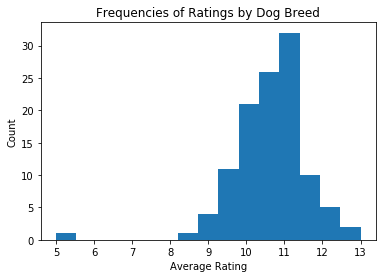

In [97]:
plt.hist(dog_breed, bins = 15);
plt.xlabel("Average Rating");
plt.ylabel("Count");
plt.title("Frequencies of Ratings by Dog Breed");

It seems that there are some outliers in the data. To eliminate these, I will look only at the dog breeds that have above the lowest quartile number of tweets.  

In [98]:
counts = twitter_archive_master.groupby("dog_breed")['tweet_id'].count()
counts.describe()

count    113.000000
mean      14.734513
std       22.072938
min        1.000000
25%        4.000000
50%        8.000000
75%       16.000000
max      155.000000
Name: tweet_id, dtype: float64

Based on this, I will drop the dog breeds that had 4 or fewer tweets. 

In [99]:
breeds = counts[counts > 4].index
dog_breed_filtered = dog_breed[dog_breed.index.isin(breeds)]

In [100]:
#The 5 dog breeds that appear in more than 4 tweets with the highest average ratings
dog_breed_filtered.sort_values(ascending = False).head(5)

dog_breed
Border terrier      12.142857
Samoyed             11.690476
Golden retriever    11.622581
Great pyrenees      11.466667
Pembroke            11.425532
Name: rating_numerator, dtype: float64

In [101]:
#The 5 dog breeds that appear in more than 4 tweets with the lowest average ratings
dog_breed_filtered.sort_values(ascending = False).tail(5)

dog_breed
Dandie dinmont                 9.571429
Boston bull                    9.416667
Dalmatian                      9.333333
Walker hound                   9.000000
Soft-coated wheaten terrier    8.500000
Name: rating_numerator, dtype: float64

In [116]:
print("There are now {} breeds".format(dog_breed_filtered.shape[0]))
print("The average rating overall is {}".format(dog_breed_filtered.mean()))
print("The highest rating overall is {}".format(dog_breed_filtered.max()))
print("The lowest rating overall is {}".format(dog_breed_filtered.min()))
dog_breed_filtered.describe()

There are now 76 breeds
The average rating overall is 10.538875223129484
The highest rating overall is 12.142857142857142
The lowest rating overall is 8.5


count    76.000000
mean     10.538875
std       0.674498
min       8.500000
25%      10.031250
50%      10.539394
75%      11.000000
max      12.142857
Name: rating_numerator, dtype: float64

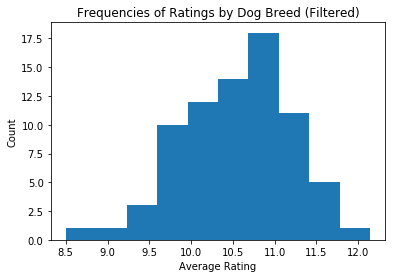

In [103]:
#Plot histogram 
plt.hist(dog_breed_filtered, bins = 10);
plt.xlabel("Average Rating");
plt.ylabel("Count");
plt.title("Frequencies of Ratings by Dog Breed (Filtered)");

By looking only at the dog breeds that appear in more than 4 tweets, the outliers have been removed from the data. We can also plot the average ratings for each individual dog breed. 

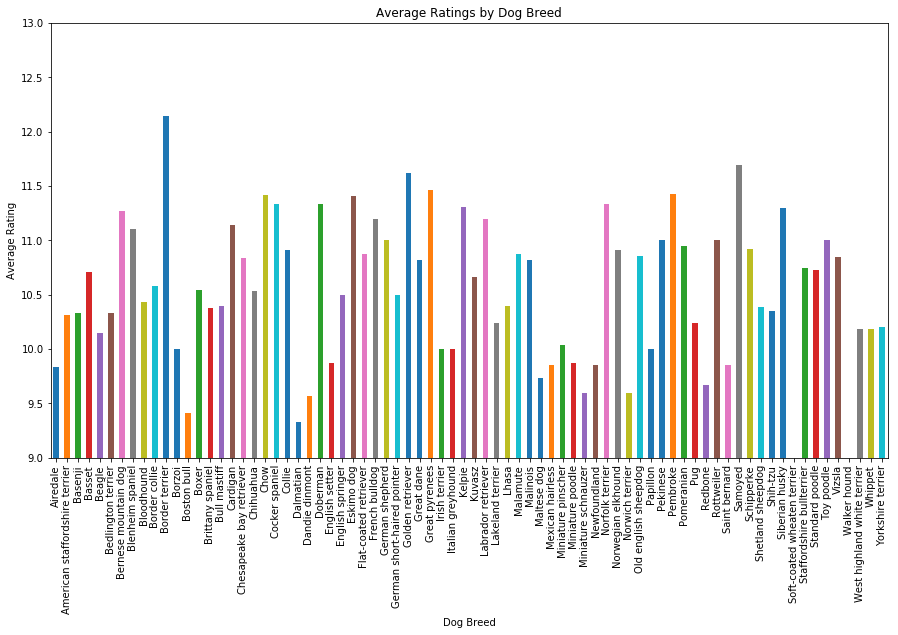

In [104]:
# Plot ratings
fig = plt.figure(figsize=(15,8))
dog_breed_filtered.plot(kind="bar")
plt.title("Average Ratings by Dog Breed")
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(9,13);

Next, I will examine popularity by dog breed, as measured by the total number of favorites and retweets. 

In [105]:
#Create a column summing up favs and retweets 
twitter_archive_master['favs_and_retweets'] = twitter_archive_master['favorite_count'] + twitter_archive_master['retweet_count']

#Take the mean of favs_and_retweets for each dog breed
dog_breeds_pop = twitter_archive_master.groupby('dog_breed').mean()['favs_and_retweets']

#Filter for breeds that appear in more than 4 tweets 
dog_breeds_pop_filtered = dog_breeds_pop[dog_breeds_pop.index.isin(breeds)]

In [106]:
print("There are now {} breeds".format(dog_breeds_pop_filtered.shape[0]))
print("The average popularity score overall is {}".format(dog_breeds_pop_filtered.mean()))
print("The highest popularity score overall is {}".format(dog_breeds_pop_filtered.max()))
print("The lowest popularity score overall is {}".format(dog_breeds_pop_filtered.min()))
dog_breeds_pop_filtered.describe()

There are now 76 breeds
The average popularity score overall is 10008.655549039118
The highest popularity score overall is 30266.0
The lowest popularity score overall is 3053.222222222222


count       76.000000
mean     10008.655549
std       5031.410365
min       3053.222222
25%       6270.637500
50%       8978.475564
75%      12882.341876
max      30266.000000
Name: favs_and_retweets, dtype: float64

In [107]:
#Dog breeds with highest average combined favorites and retweets
dog_breeds_pop_filtered.sort_values(ascending = False).head(5)

dog_breed
Bedlington terrier       30266.000000
French bulldog           23548.133333
Flat-coated retriever    19482.125000
Whippet                  17982.181818
English springer         17740.400000
Name: favs_and_retweets, dtype: float64

In [108]:
#Dog breeds with lowest average combined favorites and retweets
dog_breeds_pop_filtered.sort_values(ascending = False).tail(5)

dog_breed
Redbone                3951.833333
Miniature schnauzer    3941.400000
Maltese dog            3757.052632
Lhasa                  3140.200000
Basenji                3053.222222
Name: favs_and_retweets, dtype: float64

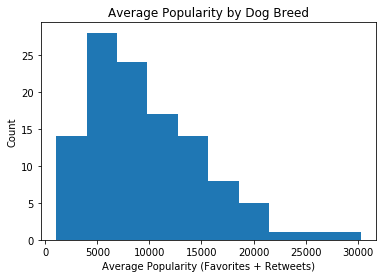

In [109]:
#Plot histogram 
plt.hist(dog_breeds_pop, bins = 10);
plt.xlabel("Average Popularity (Favorites + Retweets)");
plt.ylabel("Count");
plt.title("Average Popularity by Dog Breed");

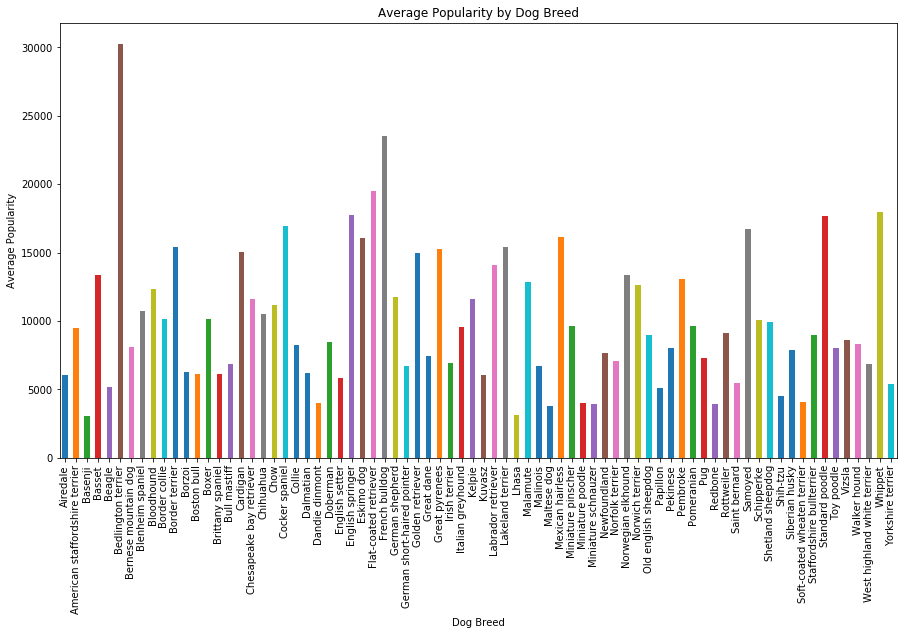

In [110]:
# Plot ratings
fig = plt.figure(figsize=(15,8));
dog_breeds_pop_filtered.plot(kind="bar");
plt.title("Average Popularity by Dog Breed");
plt.ylabel("Average Popularity");
plt.xlabel("Dog Breed");

### Dog Stages Analysis 

I will repeat the same process for the different dog stages. First, I will analyze average ratings. 

In [111]:
twitter_archive_master.dog_stage.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

In [112]:
#Remove all the entries that don't have a listed dog_stage 
temp = twitter_archive_master[~twitter_archive_master.dog_stage.isnull()]

dog_stages = twitter_archive_master.groupby('dog_stage').mean()['rating_numerator']
dog_stages.sort_values(ascending= False)

dog_stage
puppo      12.000000
floofer    11.888889
doggo      11.771084
pupper     10.734253
Name: rating_numerator, dtype: float64

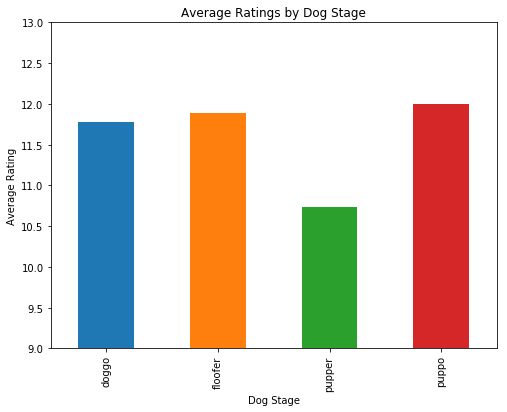

In [113]:
# Plot ratings
fig = plt.figure(figsize=(8,6))
dog_stages.plot(kind="bar")
plt.title("Average Ratings by Dog Stage")
plt.ylabel("Average Rating")
plt.xlabel("Dog Stage")
plt.ylim(9,13);

In order of highest to lowest average ratings, we have: puppo, floofer, doggo, and pupper. I will next examine popularity by dog stage.

In [114]:
#Take the mean of favs_and_retweets for each dog stage
dog_stages_pop = twitter_archive_master.groupby('dog_stage').mean()['favs_and_retweets']
dog_stages_pop.sort_values(ascending = False)

dog_stage
puppo      26817.565217
doggo      23161.682927
floofer    13722.555556
pupper      8888.095023
Name: favs_and_retweets, dtype: float64

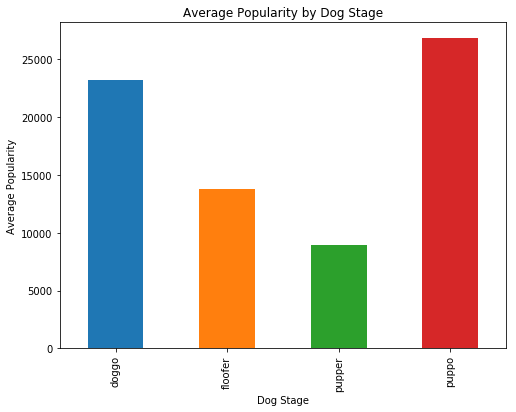

In [115]:
# Plot popularity scores
fig = plt.figure(figsize=(8,6));
dog_stages_pop.plot(kind="bar");
plt.title("Average Popularity by Dog Stage");
plt.ylabel("Average Popularity");
plt.xlabel("Dog Stage");

In order of highest to lowest popularity, we have: puppo, doggo, floofer, and pupper. To summarize some of the key insights gained through this analysis: 

*Dog Breeds*
* Filtering out dog breeds that appeared in 4 or fewer tweets, the analysis included 76 distinct breeds. The average rating overall is 10.57, the highest average rating overall is 12.54 (Pomeranian), and the lowest average rating overall is 8.5 (Soft-coated wheaten terrier). 
* The 5 breeds with the highest average rankings were: Border terrier, Samoyed, Golden retriever, Great pyrenees, and Pembroke. 
* The 5 breeds with the lowest average rankings were: Soft-coated wheaten terrier, Walker hound, Dalmatian, Boston bull, and Dandie dinmont. 
* The 5 breeds with the highest average popularity scores (favorites + retweets) were: Bedlington terrier, French bulldog, Float-coated retriever, Whippet, and English springer. 
* The 5 breeds with the lowest average popularity scores were: Basenji, Lhasa, Maltese dog, Miniature schnauzer, and Redbone. 


*Dog Stages*
* From highest to lowest average ranking: puppo, floofer, doggo, and pupper. 
* From highest to lowest average popularity: puppo, doggo, floofer, pupper
